# Feature Engineering

### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.pandas.set_option('display.max_columns', None)

### Import du dataset

In [2]:
data = pd.read_csv('Data/dvf.csv', low_memory=False)
print(data.shape)
data.head()

(2224142, 17)


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,id_bien
0,2017-2,2017-01-05,Vente,115000.0,LES VAVRES,Péronnas,01,01289000AR0388,0,NaN,NaN,NaN,NaN,788.0,5.203419,46.176087,01289000AR0388-01
1,2017-3,2017-01-06,Vente,1.0,LA POIPE,Saint-Cyr-sur-Menthon,01,01343000ZM0197,0,NaN,NaN,NaN,NaN,42.0,4.975828,46.277320,01343000ZM0197-01
2,2017-4,2017-01-09,Vente,1.0,MONTGRIMOUX CENTRE,Feillens,01,01159000AH0996,0,NaN,NaN,NaN,NaN,50.0,4.904049,46.337128,01159000AH0996-01
3,2017-5,2017-01-03,Vente,258000.0,IMP DES PINSONS,Saint-Denis-lès-Bourg,01,01344000AK0042,0,2.0,Appartement,120.0,5.0,655.0,5.205776,46.197455,01344000AK0042-01
4,2017-6,2017-01-05,Vente,175050.0,SAINT MICHEL,Val-Revermont,01,01426000ZI0195,0,1.0,Maison,99.0,5.0,471.0,5.361589,46.274684,01426000ZI0195-01


### Séparation du dataset en train et test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, data.valeur_fonciere,
                                                    test_size=0.3,
                                                    random_state=123) 
X_train.shape, X_test.shape

((1556899, 17), (667243, 17))

### Valeurs manquantes
Pour les variables catégoriques nous allons remplacer les valeurs manquantes par une nouvelle catégorie 'Missing'

In [4]:
# création d'une liste contenant les variables catégoriques
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# affichage des variable avec le pourcentage de valeurs manquantes
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % valeurs manquantes')

adresse_nom_voie 0.001  % valeurs manquantes
type_local 0.393  % valeurs manquantes


In [5]:
# fonction remplaçant les valeurs manquantes par la catégorie 'Missing'
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [6]:
# remplacement des valeurs manquantes dans le train et le test
X_train = fill_categorical_na(X_train, vars_with_na)
X_test = fill_categorical_na(X_test, vars_with_na)

# Vérification qu'il n'y ait plus de valeurs manquantes
X_train[vars_with_na].isnull().sum()

adresse_nom_voie    0
type_local          0
dtype: int64

In [7]:
# vérification que l'ensemble de test ne contient pas de valeurs nulles dans les variables modifiées
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

Pour les variables numériques, nous allons ajouter une variable supplémentaire capturant les informations manquantes, puis remplacer les informations manquantes dans la variable d'origine par le mode, ou la valeur la plus fréquente

In [8]:
# création d'une liste contenant les variables numériques contenant les valeurs manquantes 
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# afiichage de ces variables avec le pourcentage
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % valeur manquantes')

code_type_local 0.393  % valeur manquantes
surface_reelle_bati 0.45  % valeur manquantes
nombre_pieces_principales 0.394  % valeur manquantes
surface_terrain 0.156  % valeur manquantes
longitude 0.024  % valeur manquantes
latitude 0.024  % valeur manquantes


In [9]:
# replacement des valeurs manquantes
for var in vars_with_na:
    
    # calcul du mode
    mode_val = X_train[var].mode()[0]
    
    # train
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    X_test[var].fillna(mode_val, inplace=True)

# vérification qu'il n'y ait plus de valeurs manquantes
X_train[vars_with_na].isnull().sum()

code_type_local              0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64

In [10]:
# verification qu'il y ait bien les variables binaires contenant les valeurs manquantes
X_train[['code_type_local_na', 'surface_reelle_bati_na', 'nombre_pieces_principales', 'surface_terrain_na', 'longitude_na', 'latitude_na']].head()

,code_type_local_na,surface_reelle_bati_na,nombre_pieces_principales,surface_terrain_na,longitude_na,latitude_na
908673,0,0,3.0,0,0,0
81448,0,0,5.0,0,0,0
794832,1,1,4.0,0,0,0
2004947,0,1,0.0,1,0,0
159472,1,1,4.0,0,0,0


In [11]:
# vérification que l'ensemble de test ne contient pas de valeurs nulles dans les variables modifiées
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

### Variable numérique
Nous allons transformer les variables numériques (valeurs continues), afin d'obtenir une distribution plus gaussienne. Cela a tendance à aider les modèles d'apprentissage automatique linéaire

In [12]:
for var in ['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'longitude', 'latitude']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

C:\Users\amand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
# vérification pour le train
[var for var in ['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'longitude', 'latitude'] if X_train[var].isnull().sum()>0]

['longitude', 'latitude']

In [14]:
# vérification pour la test
[var for var in ['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'longitude', 'latitude'] if X_test[var].isnull().sum()>0]

['longitude', 'latitude']

### Variables catégoriques
Nous allons supprimer les catégories des variables présentes dans moins de 1% des observations

In [15]:
# récupérons les variables catégoriques
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O' and var not in ['id_mutation', 'id_parcelle', 'id_bien', 'date_mutation', 'adresse_nom_voie', 'nom_commune']]

In [16]:
def find_frequent_labels(df, var, rare_perc):
    # récupérons les labels partagés par plus d'un certain % des maisons du dataset
    df = df.copy()
    tmp = df.groupby(var)['valeur_fonciere'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

Ensuite, nous allons transformer le texte de ces variables en nombres

In [17]:
# cette fonction affectera des valeurs discrètes aux chaînes des variables,
# de sorte que la plus petite valeur corresponde à la plus petite moyenne de la cible
def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [18]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'valeur_fonciere')

In [19]:
# vérification de l'abscence de na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

['longitude', 'latitude']

In [20]:
# vérification de l'abscence de na
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

['longitude', 'latitude']

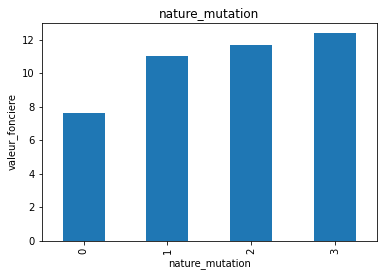

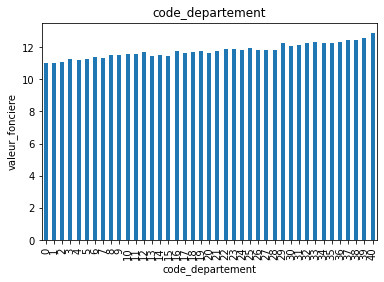

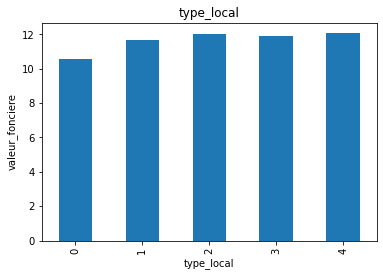

In [21]:
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['valeur_fonciere'].median().plot.bar()
    plt.title(var)
    plt.ylabel('valeur_fonciere')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

### Feature scaling

In [22]:
train_vars = [var for var in X_train.columns if var not in ['id_mutation', 'id_parcelle', 'id_bien', 'date_mutation', 'adresse_nom_voie', 'nom_commune', 'valeur_fonciere']]
len(train_vars)

16

In [23]:
X_train[['id_mutation', 'id_parcelle', 'id_bien', 'date_mutation', 'adresse_nom_voie', 'nom_commune', 'valeur_fonciere']].reset_index(drop=True)

,id_mutation,id_parcelle,id_bien,date_mutation,adresse_nom_voie,nom_commune,valeur_fonciere
0,2017-1381514,95018000AV0057,95018000AV0057-95,2017-05-16,RUE DE ST QUENTIN,Argenteuil,12.354493
1,2017-131542,132098460A0288,132098460A0288-13,2017-04-07,RUE ANTOINE FORTUNE MARION,Marseille 9e Arrondissement,13.075272
2,2017-1162525,83038000AB0022,83038000AB0022-83,2017-05-22,SAINTE ANNE,Châteaudouble,11.652687
3,2019-173403,44109000NY0325,44109000NY0325-44,2019-03-29,RUE FELIX LEMOINE,Nantes,9.510445
4,2017-242501,22011000AB0237,22011000AB0237-22,2017-04-27,LE BOURG,Boqueho,8.006368
...,...,...,...,...,...,...,...
1556894,2019-113340,33281000BX0364,33281000BX0364-33,2019-01-28,RUE DES ORMES,Mérignac,13.102161
1556895,2018-430810,34336000AC0154,34336000AC0154-34,2018-02-28,LE VILLAGE,Villeneuve-lès-Béziers,13.226723
1556896,2017-34071,040450000F0867,040450000F0867-04,2017-10-31,CLOS PAUL ARENE,Céreste,12.024910
1556897,2017-404719,33268000AI0071,33268000AI0071-33,2017-02-11,LE MATHA,Margaux-Cantenac,8.411833


In [24]:
# fit scaler
scaler = MinMaxScaler() 
scaler.fit(X_train[train_vars])

# transform the train and test set
X_train = pd.concat([X_train[['id_mutation', 'id_parcelle', 'id_bien', 'date_mutation', 'adresse_nom_voie', 'nom_commune', 'valeur_fonciere']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['id_mutation', 'id_parcelle', 'id_bien', 'date_mutation', 'adresse_nom_voie', 'nom_commune', 'valeur_fonciere']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [25]:
X_train.head()

,id_mutation,id_parcelle,id_bien,date_mutation,adresse_nom_voie,nom_commune,valeur_fonciere,nature_mutation,code_departement,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local_na,surface_reelle_bati_na,nombre_pieces_principales_na,surface_terrain_na,longitude_na,latitude_na
0,2017-1381514,95018000AV0057,95018000AV0057-95,2017-05-16,RUE DE ST QUENTIN,Argenteuil,12.354493,0.666667,0.950,0.00000,0.000000,1.00,0.331789,0.033333,0.317739,0.808165,0.984716,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-131542,132098460A0288,132098460A0288-13,2017-04-07,RUE ANTOINE FORTUNE MARION,Marseille 9e Arrondissement,13.075272,0.666667,0.875,0.00000,0.000000,1.00,0.381939,0.055556,0.405742,0.860498,0.940072,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-1162525,83038000AB0022,83038000AB0022-83,2017-05-22,SAINTE ANNE,Châteaudouble,11.652687,0.666667,0.850,0.00000,0.000000,0.00,0.349591,0.044444,0.497230,0.871099,0.943037,1.0,1.0,1.0,0.0,0.0,0.0
3,2019-173403,44109000NY0325,44109000NY0325-44,2019-03-29,RUE FELIX LEMOINE,Nantes,9.510445,0.666667,0.575,0.00303,0.666667,0.25,0.349591,0.000000,0.416154,NaN,0.971868,0.0,1.0,0.0,1.0,0.0,0.0
4,2017-242501,22011000AB0237,22011000AB0237-22,2017-04-27,LE BOURG,Boqueho,8.006368,0.666667,0.125,0.00000,0.000000,0.00,0.349591,0.044444,0.227757,NaN,0.981227,1.0,1.0,1.0,0.0,0.0,0.0


In [26]:
# vérification de l'absence des valeurs nulles
X_train.isnull().sum()

id_mutation                          0
id_parcelle                          0
id_bien                              0
date_mutation                        0
adresse_nom_voie                     0
nom_commune                          0
valeur_fonciere                      0
nature_mutation                      0
code_departement                     0
nombre_lots                          0
code_type_local                      0
type_local                           0
surface_reelle_bati                  0
nombre_pieces_principales            0
surface_terrain                      0
longitude                       393623
latitude                          6282
code_type_local_na                   0
surface_reelle_bati_na               0
nombre_pieces_principales_na         0
surface_terrain_na                   0
longitude_na                         0
latitude_na                          0
dtype: int64

In [27]:
# sauvegarde des datasets
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)